In [1]:
%run my_functions.ipynb

In [2]:
#10 clauses from hybrid problem 4
sat_formula = [[1, 3, 4],
 [1, -3, -4],
 [3, 4, 5],
 [1, 2, 4],
 [1, 3, 5],
 [1, 2, -4],
 [-1, -2, -4],
 [1, 4, 5],
 [-2, -3, -5],
 [1, 2, 4]]

#It has 10 solutions according to brute force method

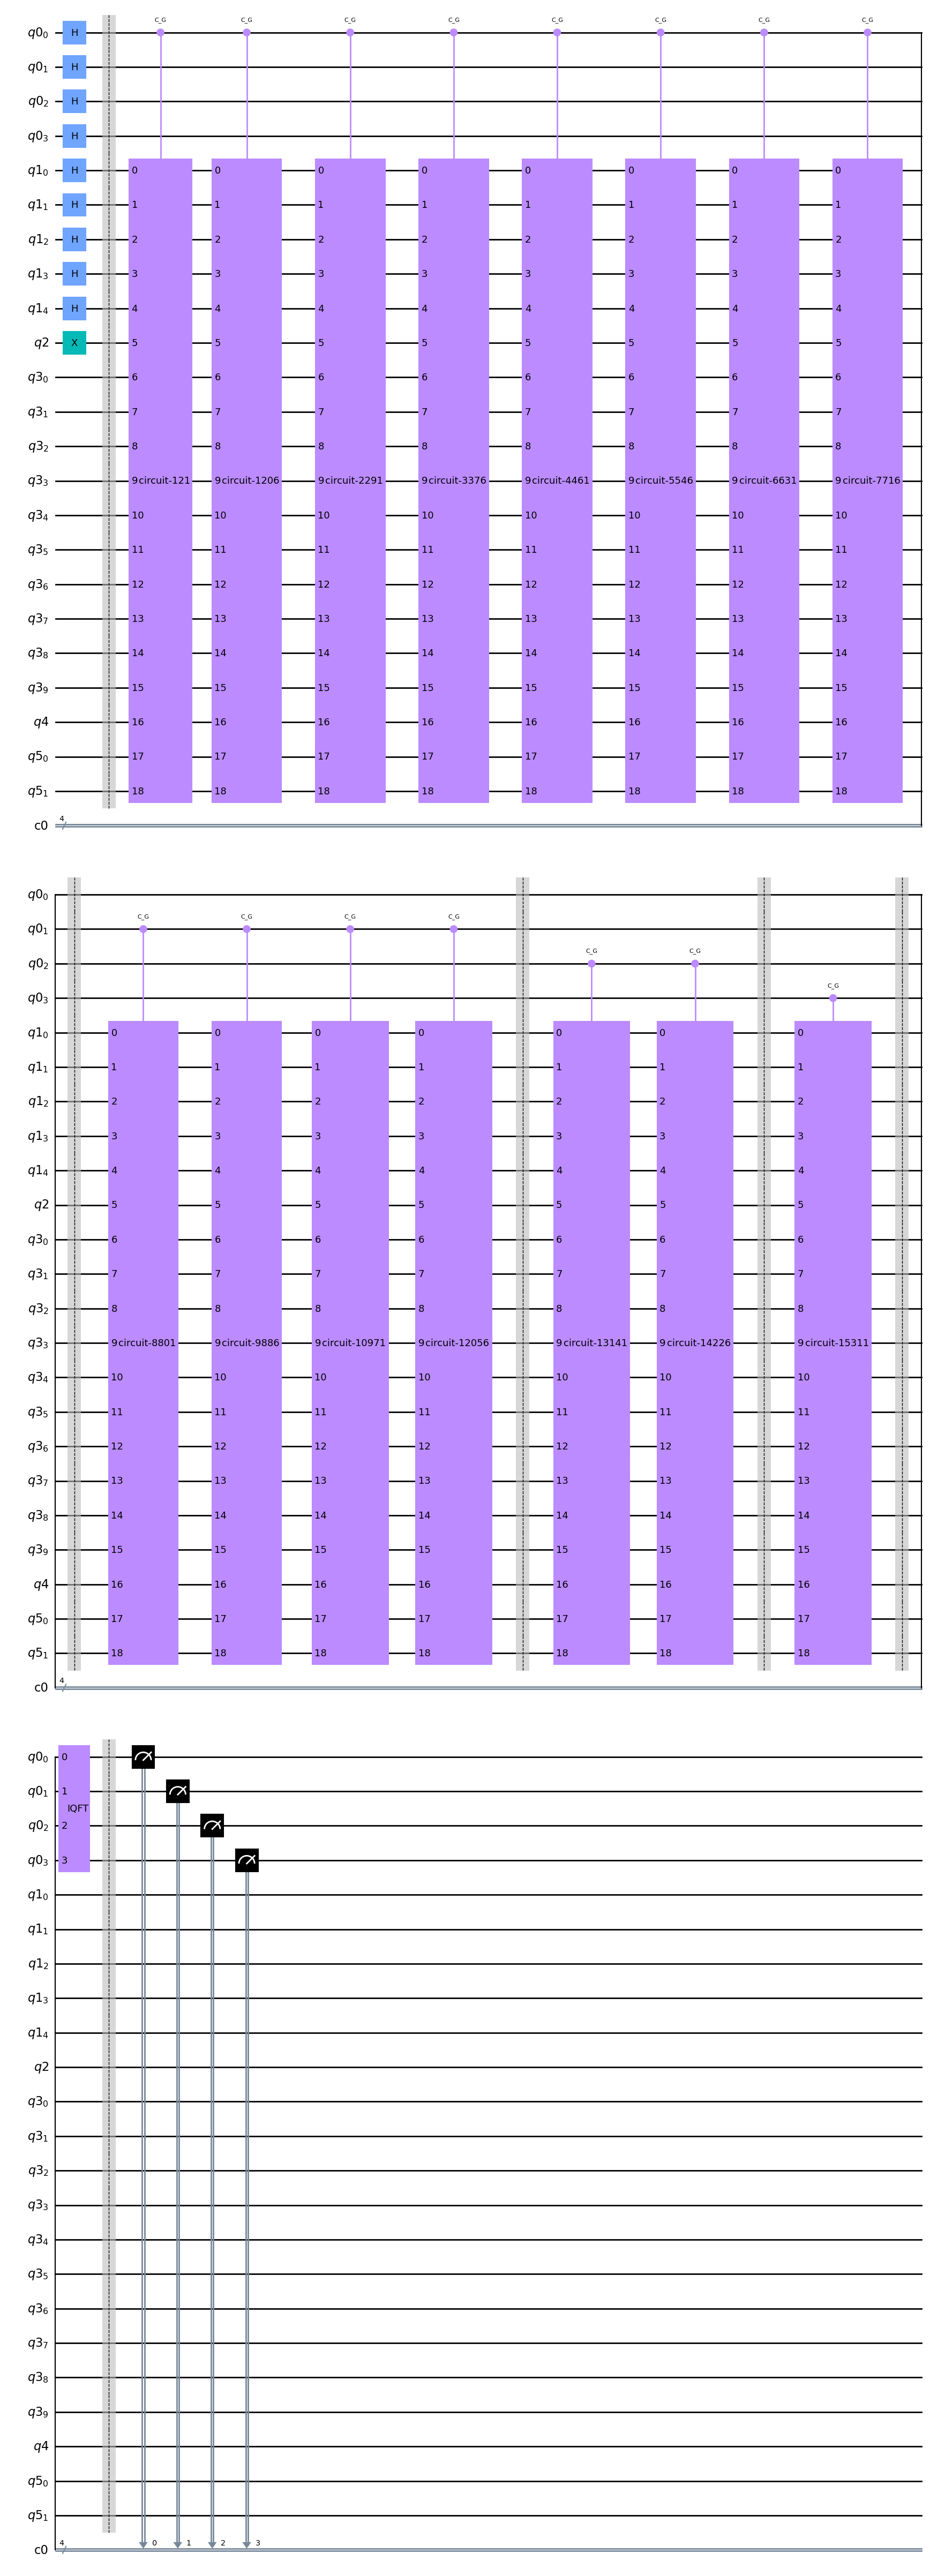

In [3]:
m = 3
e = 1/10
circuit = quantum_counting(sat_formula,m,e)
circuit.draw('mpl')

In [4]:
counts = execute(circuit,Aer.get_backend('qasm_simulator'),shots=2000).result().get_counts()
measured_str = max(counts, key=counts.get)[::-1]
measured_int = int(measured_str,2)
measured_int

7

In [5]:
#Number of marked elements
t = m + math.floor(math.log(2+0.5/e))
n = max(max(sat_clause) for sat_clause in sat_formula)
theta = (measured_int/(2**t))*math.pi
N = 2**n
M = N * (math.sin(theta/2))**2
numsols = round(N-M)
numsols

19

In [6]:
round(M)

13

### Finding the behaviour of num of solutions as a function of m

In [7]:
n = max(max(sat_clause) for sat_clause in sat_formula)
N = 2**n
numsols = []
sols_rem = []
i = list(range(1,n+1))
for m in i:
    e = 1/10
    circuit = quantum_counting(sat_formula,m,e)
    counts = execute(circuit,Aer.get_backend('qasm_simulator'),shots=2000).result().get_counts()
    measured_str = max(counts, key=counts.get)[::-1]
    measured_int = int(measured_str,2)
    #Number of marked elements
    t = m + math.floor(math.log(2+0.5/e))
    theta = (measured_int/(2**t))*math.pi
    M = N * (math.sin(theta/2))**2
    numsols.append(round(N-M))
    sols_rem.append(M)


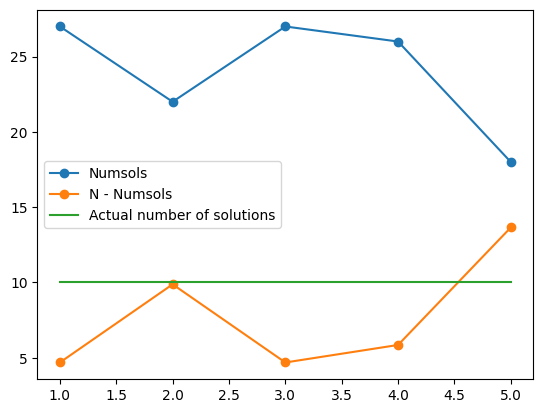

In [8]:
solution = [10]*len(i)
plt.plot(i,numsols, '-o', label='Numsols')
plt.plot(i,sols_rem,'-o', label='N - Numsols')
plt.plot(i,solution,label='Actual number of solutions')
plt.legend()

In [9]:
theta = []
num_iter = []
for i in range(len(numsols)):
    theta.append(math.sqrt(numsols[i]/N))
    num_iter.append(round(math.pi/(4*theta[i]) - 0.5))

In [10]:
theta

[0.9185586535436918,
 0.82915619758885,
 0.9185586535436918,
 0.9013878188659973,
 0.75]

In [11]:
num_iter

[0, 0, 0, 0, 1]